# Project 1

**Dataset:** Speed dating


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy.stats as stats
import pandas as pd


ModuleNotFoundError: No module named 'seaborn'

In [3]:
import wandb

super_secret_API_key = "d1678741bcd8eb1d90ca26aa8f2bf079256ac391"

wandb.login(key=super_secret_API_key)
# ak to chceme pouzivat, tak si tu budes musiet spravit ucet aby som ti mohol dat pristup
# https://wandb.ai/bizon-mimi-stu/ZNEUS_project1/workspace?nw=nwuserbizonmimi

C:\Users\andre\PycharmProjects\ZNEUS_2025\ZNEUS_1\.venv\Lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
C:\Users\andre\PycharmProjects\ZNEUS_2025\ZNEUS_1\.venv\Lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This m

True

In [11]:
# wandb test
import random

# Start a new wandb run to track this script.
run = wandb.init(
    entity="bizon-mimi-stu",  # team name
    project="ZNEUS_project1",  # project name
    # Track hyperparameters and run metadata.
    config={
        "learning_rate": 0.02,
        "architecture": "CNN",
        "dataset": "CIFAR-100",
        "epochs": 10,
    },
)

# Simulate training.
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2**-epoch - random.random() / epoch - offset
    loss = 2**-epoch + random.random() / epoch + offset

    # Log metrics to wandb.
    run.log({"acc": acc, "loss": loss})

# Finish the run and upload any remaining data.
run.finish()

acc,▁▄▇▆█▇▇█
loss,█▃▃▃▂▁▂▁
acc,0.79636
loss,0.1948


In [4]:
df_dating = pd.read_csv("speeddating.csv")
df_dating.head(10)

C:\Users\andre\AppData\Local\Temp\ipykernel_10680\1733531408.py:1: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dating = pd.read_csv("speeddating.csv")


,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,...,[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
4,0,1,female,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,...,[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1
5,0,1,female,21,25,4,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],6,5,[6-8],[5-6],0,0,1,0
6,0,1,female,21,30,9,[7-37],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],6,5,[6-8],[5-6],0,1,0,0
7,1,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],6,7,[6-8],[7-10],?,0,0,0
8,0,1,female,21,28,7,[7-37],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,7,[6-8],[7-10],0,1,1,1
9,0,1,female,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],6,6,[6-8],[5-6],0,1,0,0


In [22]:
df_dating.replace("?", np.nan, inplace=True)

In [23]:
df_dating.shape

(8378, 123)

In [12]:
df_dating.info

<bound method DataFrame.info of       has_null  wave  gender age age_o  d_age d_d_age  \
0            0     1  female  21    27      6   [4-6]   
1            0     1  female  21    22      1   [0-1]   
2            1     1  female  21    22      1   [0-1]   
3            0     1  female  21    23      2   [2-3]   
4            0     1  female  21    24      3   [2-3]   
...        ...   ...     ...  ..   ...    ...     ...   
8373         1    21    male  25    26      1   [0-1]   
8374         1    21    male  25    24      1   [0-1]   
8375         1    21    male  25    29      4   [4-6]   
8376         1    21    male  25    22      3   [2-3]   
8377         1    21    male  25    22      3   [2-3]   

                                         race  \
0     'Asian/Pacific Islander/Asian-American'   
1     'Asian/Pacific Islander/Asian-American'   
2     'Asian/Pacific Islander/Asian-American'   
3     'Asian/Pacific Islander/Asian-American'   
4     'Asian/Pacific Islander/Asian-Am

In [13]:
df_dating.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
 #    Column                           Dtype 
---   ------                           ----- 
 0    has_null                         int64 
 1    wave                             int64 
 2    gender                           object
 3    age                              object
 4    age_o                            object
 5    d_age                            int64 
 6    d_d_age                          object
 7    race                             object
 8    race_o                           object
 9    samerace                         int64 
 10   importance_same_race             object
 11   importance_same_religion         object
 12   d_importance_same_race           object
 13   d_importance_same_religion       object
 14   field                            object
 15   pref_o_attractive                object
 16   pref_o_sincere                   object
 17   pref_o_intel

In [14]:
missing_values = df_dating.isnull().sum().sort_values(ascending=False)

# Percentage of missing values
missing_percentage = (df_dating.isnull().mean() * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_df.head(50))

                               Missing Values  Percentage
expected_num_interested_in_me            6578   78.515159
expected_num_matches                     1173   14.000955
shared_interests_o                       1076   12.843161
shared_interests_partner                 1067   12.735736
ambitous_o                                722    8.617809
ambition_partner                          712    8.498448
met                                       375    4.476009
funny_o                                   360    4.296968
funny_partner                             350    4.177608
guess_prob_liked                          309    3.688231
intelligence_o                            306    3.652423
intelligence_partner                      296    3.533063
sinsere_o                                 287    3.425639
sincere_partner                           277    3.306278
like                                      240    2.864646
attractive_o                              212    2.530437
attractive_par

In [27]:
duplicates = df_dating.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")


#df = df.drop_duplicates()

Number of duplicate rows: 0


In [28]:
df_dating.dtypes.value_counts()  # How many numeric, object, etc.

categorical = df_dating.select_dtypes(include=['object']).columns
for col in categorical[:10]:  # Show first 10 to avoid spam
    print(f"{col}: {df_dating[col].nunique()} unique values")

gender: 2 unique values
age: 30 unique values
age_o: 24 unique values
d_d_age: 4 unique values
race: 5 unique values
race_o: 5 unique values
importance_same_race: 17 unique values
importance_same_religion: 15 unique values
d_importance_same_race: 3 unique values
d_importance_same_religion: 3 unique values


In [24]:
df_dating["d_pref_o_attractive"].unique()

array(['[21-100]', '[16-20]', '[0-15]'], dtype=object)

In [25]:
df_dating["d_d_age"].unique()

array(['[4-6]', '[0-1]', '[2-3]', '[7-37]'], dtype=object)

In [35]:
df_dating["d_importance_same_religion"].unique()

array(['[2-5]', '[0-1]', '[6-10]'], dtype=object)

In [ ]:
for col in df_dating.columns:
    

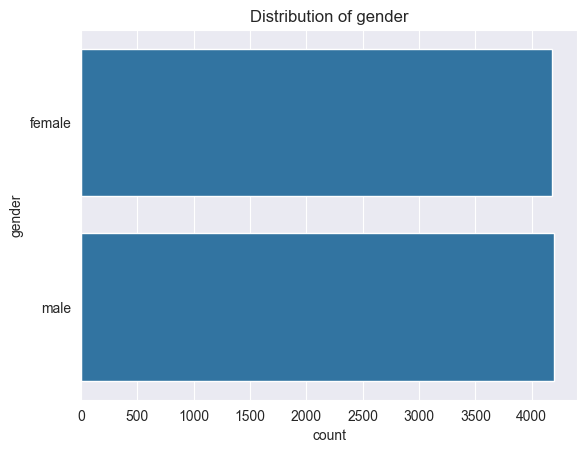

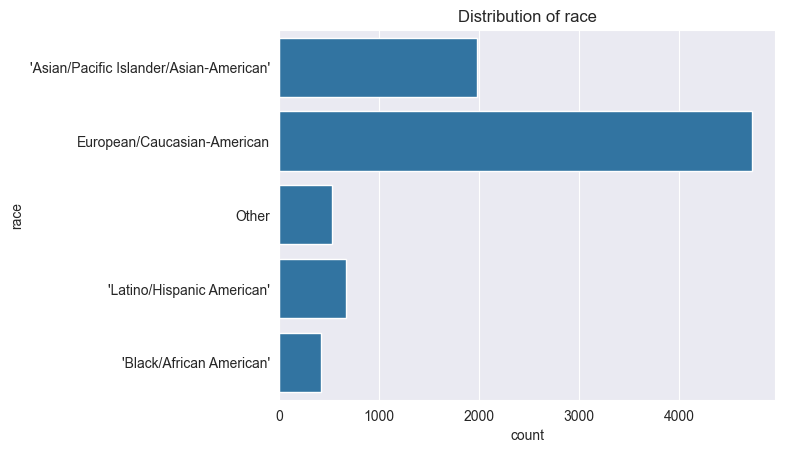

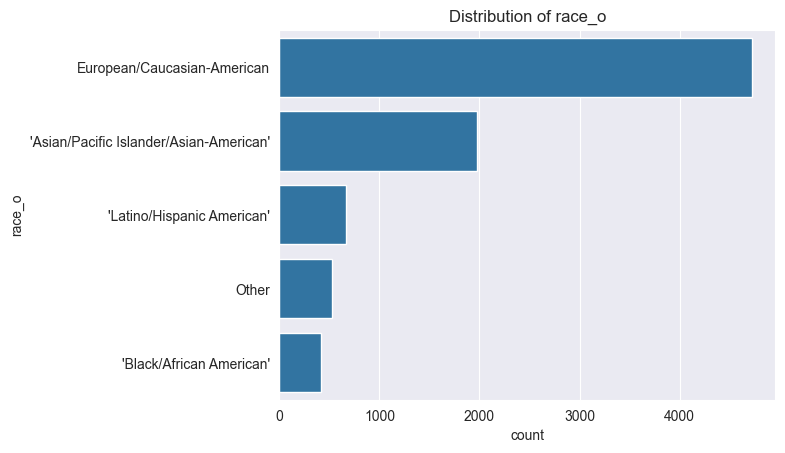

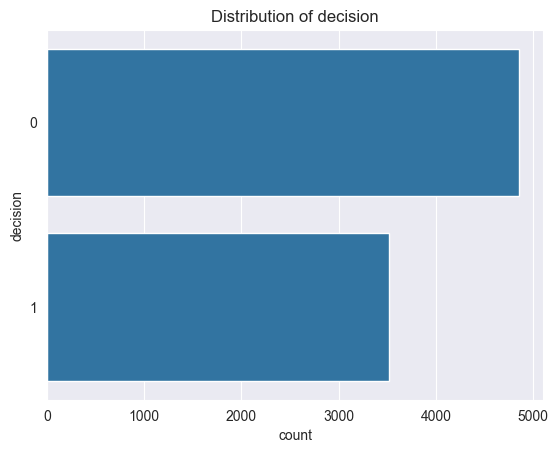

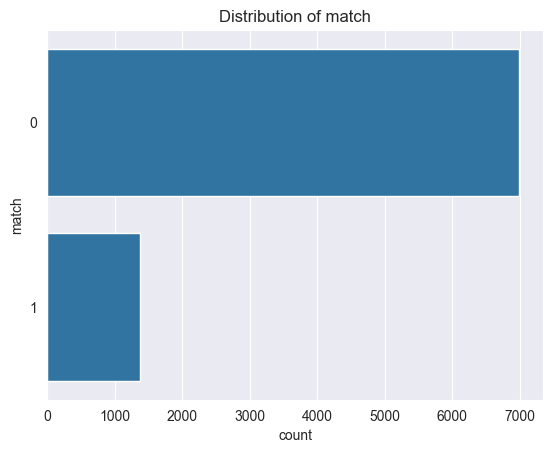

In [29]:
categorical = ['gender', 'race', 'race_o', 'decision', 'match']
for col in categorical:
    sns.countplot(y=col, data=df_dating)
    plt.title(f"Distribution of {col}")
    plt.show()

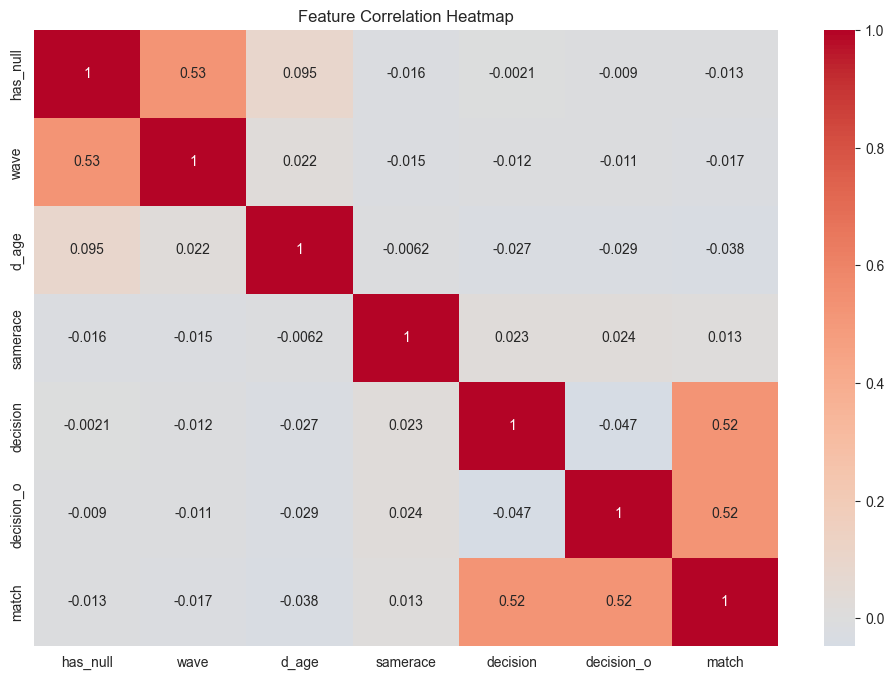

match         1.000000
decision_o    0.522326
decision      0.521943
samerace      0.013028
has_null     -0.013011
wave         -0.017404
d_age        -0.038239
Name: match, dtype: float64

In [38]:
corr = df_dating.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

corr['match'].sort_values(ascending=False).head(10)

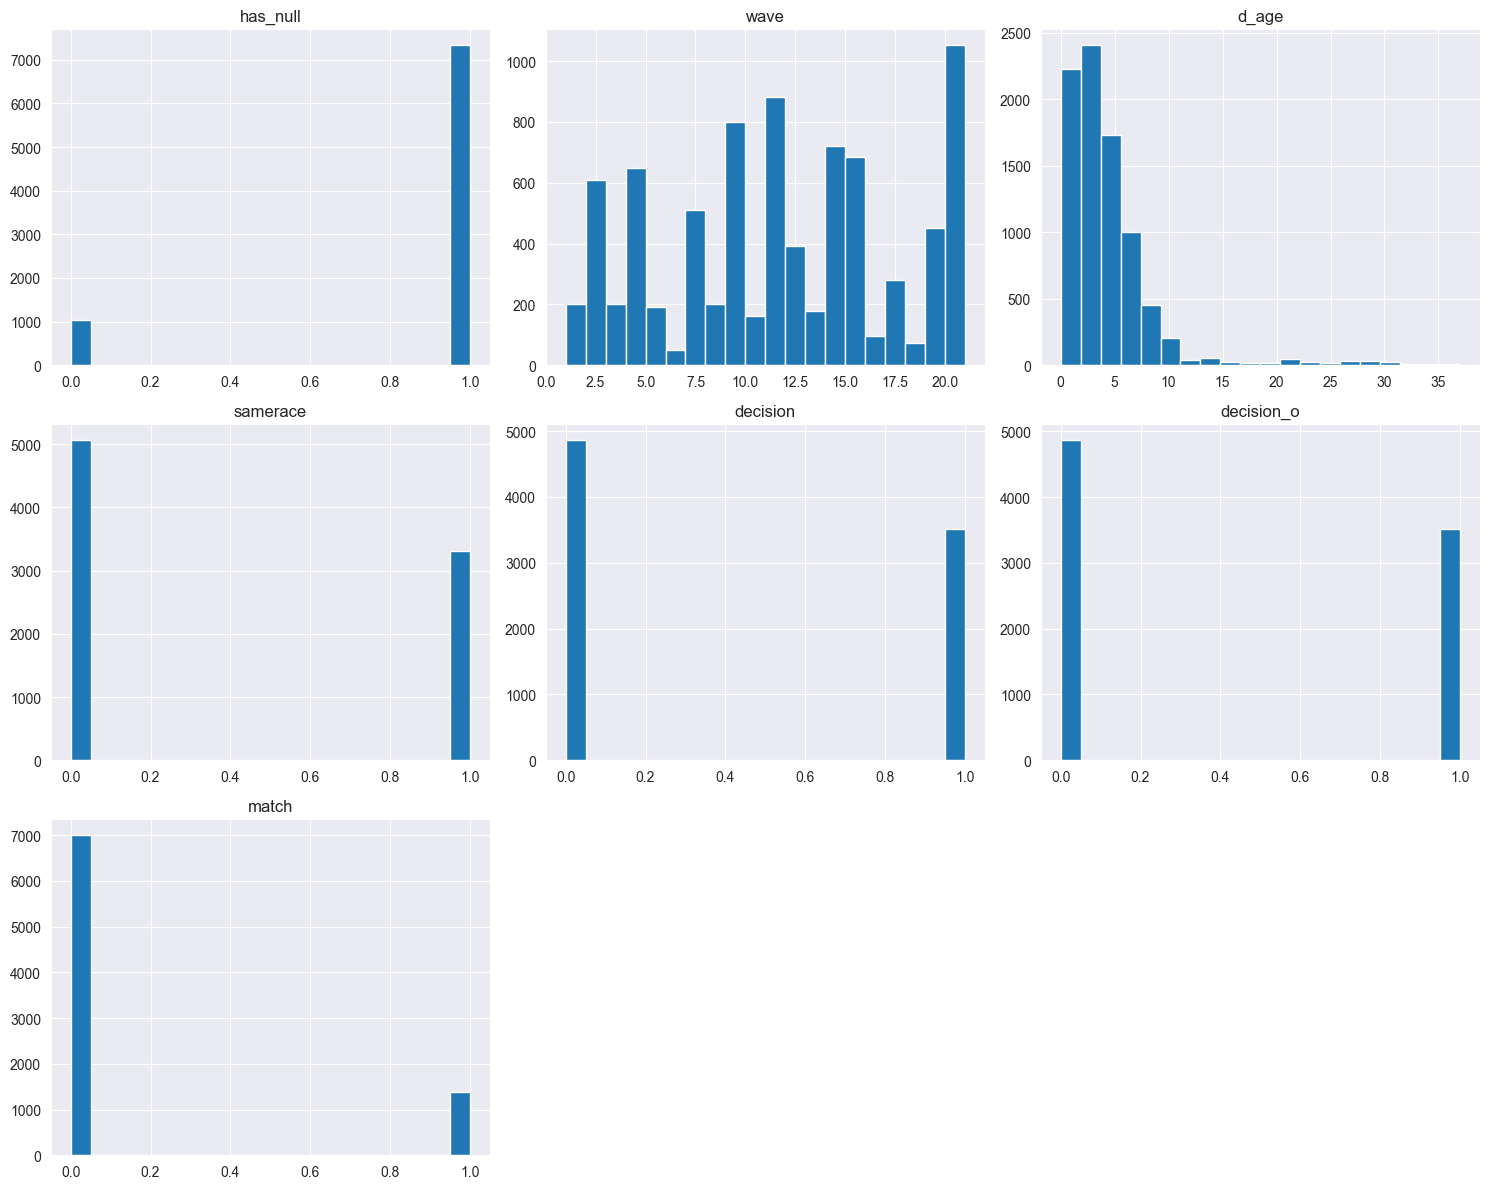

In [39]:
num_cols = df_dating.select_dtypes(include=['int64', 'float64']).columns

df_dating[num_cols].hist(figsize=(15,12), bins=20)
plt.tight_layout()
plt.show()

použit precision metric ---

In [34]:
df_dating.describe()

,has_null,wave,d_age,samerace,decision,decision_o,match
count,8378.00000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
mean,0.87491,11.350919,4.185605,0.395799,0.419909,0.419551,0.164717
std,0.33084,5.995903,4.596171,0.489051,0.493573,0.493515,0.370947
min,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,1.00000,15.000000,5.000000,1.000000,1.000000,1.000000,0.000000
max,1.00000,21.000000,37.000000,1.000000,1.000000,1.000000,1.000000
